# Семинар по Pytorch.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

Установка: https://pytorch.org/get-started/locally/  
В этом ноутбуке будут разобраны основные особенности фреймворка Pytorch. Pytorch - это как Numpy, только умеет эффективно автоматически считать градиенты.

In [2]:
import torch

print(torch.__version__)

2.5.1+cu121


In [3]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [4]:
# проверить, доступна ли у вас cuda.
torch.cuda.is_available()

False

# Базовые операции

In [5]:
# numpy

x = np.arange(25).reshape(5, 5)

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(np.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(np.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(np.cumsum(x, axis=1)))

X :
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

X.shape : (5, 5)
 
Возвести в квадрат:
 [[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]

X*X^T  :
 [[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]

Cреднее по столбцам :
 [10. 11. 12. 13. 14.]

Сумма по строкам:
 [[  0   1   3   6  10]
 [  5  11  18  26  35]
 [ 10  21  33  46  60]
 [ 15  31  48  66  85]
 [ 20  41  63  86 110]]



tensor - numpy array, только можно считать градиенты

In [6]:
# torch

x = torch.arange(25).reshape(5, 5).float()

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(torch.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(torch.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(torch.cumsum(x, axis=1)))

X :
 tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

X.shape : torch.Size([5, 5])
 
Возвести в квадрат:
 tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.],
        [400., 441., 484., 529., 576.]])

X*X^T  :
 tensor([[  30.,   80.,  130.,  180.,  230.],
        [  80.,  255.,  430.,  605.,  780.],
        [ 130.,  430.,  730., 1030., 1330.],
        [ 180.,  605., 1030., 1455., 1880.],
        [ 230.,  780., 1330., 1880., 2430.]])

Cреднее по столбцам :
 tensor([10., 11., 12., 13., 14.])

Сумма по строкам:
 tensor([[  0.,   1.,   3.,   6.,  10.],
        [  5.,  11.,  18.,  26.,  35.],
        [ 10.,  21.,  33.,  46.,  60.],
        [ 15.,  31.,  48.,  66.,  85.],
        [ 20.,  41.,  63.,  86., 110.]])



# Pytorch - почти Numpy.
Вы можете создавать тензоры, смотреть на их градиенты, не создавая сессии как в tensorflow.
Названия методов очень похожи. Если они отличаются - загляните в таблицу: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users


# Pytroch сам считает backpropagation для нас с помощью модуля autograd

In [7]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print(loss)

# запускаем backprop
loss.backward() #граф вычислений - от него зависел loss

tensor(1., grad_fn=<MeanBackward0>)


Градиенты нужны чтоб минимизировать функцию потерь - менять веса модели - обучение

In [8]:
# градиенты доступны в поле .grad:
preds.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

In [9]:
# градиенты можно занулить
preds.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [10]:
# теперь градиенты снова 0
preds.grad

tensor([0., 0., 0., 0., 0.])

Градиенты нужно занулять каждый раз, когда происходит итерация обучения

Показывает насколько нужно сдвинуть вес

Слишком большие градиенты - не сойдется или будет слишком долго

###  Градиенты накапливаются при каждом вызове backward()

In [11]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print(loss)

# запускаем backprop
for i in range(5):
    loss.backward(retain_graph=True)
    print(i, preds.grad)

tensor(1., grad_fn=<MeanBackward0>)
0 tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])
1 tensor([-0.4000, -0.4000, -0.4000, -0.4000, -0.4000])
2 tensor([-0.6000, -0.6000, -0.6000, -0.6000, -0.6000])
3 tensor([-0.8000, -0.8000, -0.8000, -0.8000, -0.8000])
4 tensor([-1., -1., -1., -1., -1.])


# Пишем свою логистическую регрессию на пайторче

In [12]:
from sklearn.datasets import make_blobs
import sklearn

X, y = make_blobs(
    n_samples=200,
    centers=((10, 5), (5, -5)),
    n_features=2,
    random_state=0,
    cluster_std=3,
)

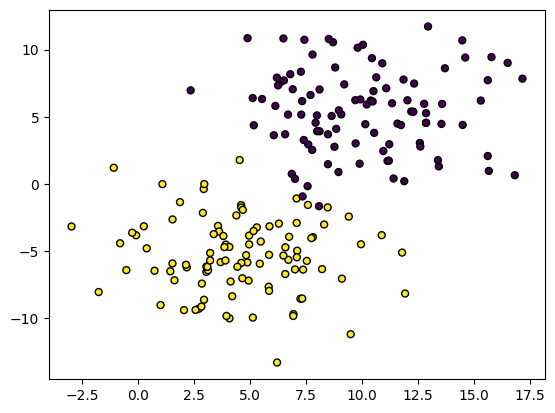

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

# Напоминание. Как это было в Sklearn:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X, y)

LogisticRegression()

In [17]:
model.coef_

array([[-0.8841315 , -1.38568117]])

In [18]:
model.intercept_

array([5.78149723])

## Визуализируем разделяющую плоскость

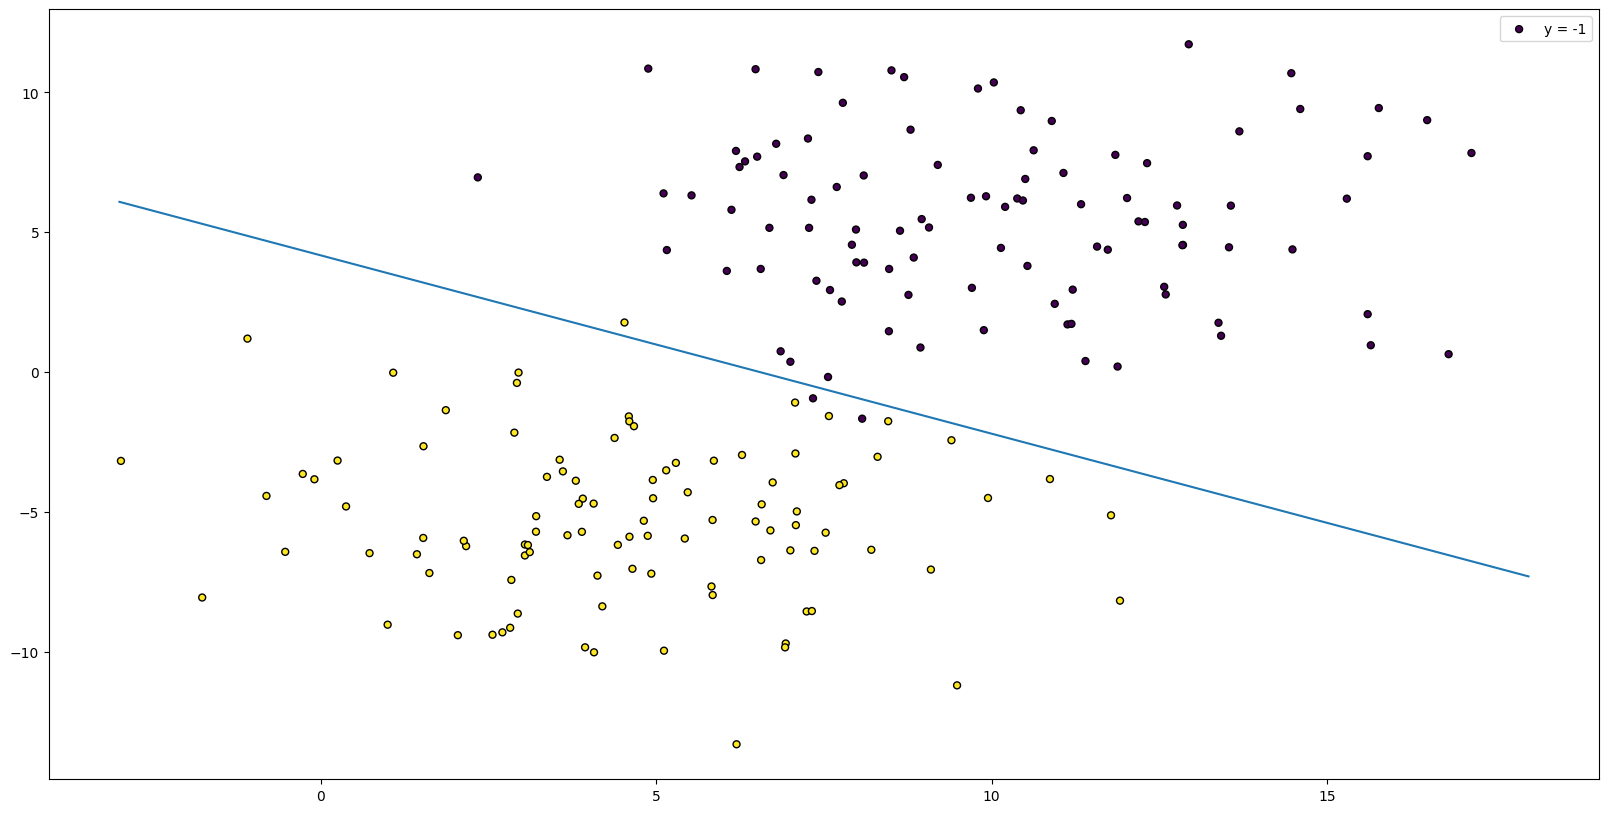

In [19]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
w_0 = model.intercept_[0]

plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.legend(["y = -1", "y = 1"])
x_arr = np.linspace(-3, 18, 1000)

y_arr = -(w_0 + w_1 * x_arr) / w_2
plt.plot(x_arr, y_arr)
plt.show()

# Pytorch

In [20]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, cluster_std=3)

In [21]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [22]:
X = torch.tensor(X) #нужно конвертировать
y = torch.tensor(y)

In [23]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [24]:
print(X.shape, y.shape)

torch.Size([200, 2]) torch.Size([200])


In [25]:
len(X)

200

In [26]:
len(y)

200

# Напишем свою логистическую регрессию на пайторче

In [27]:
X, y = make_blobs(
    n_samples=200,
    centers=((10, 5), (5, -5)),
    n_features=2,
    random_state=0,
    cluster_std=3,
)

In [28]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [29]:
X = torch.tensor(X)
y = torch.tensor(y)

In [30]:
assert type(X) == torch.Tensor
assert type(y) == torch.Tensor

Инициализируем веса

In [31]:
w = torch.zeros(2, requires_grad=True, dtype=torch.double)
b = torch.zeros(1, requires_grad=True, dtype=torch.double)

In [32]:
w

tensor([0., 0.], dtype=torch.float64, requires_grad=True)

In [33]:
b

tensor([0.], dtype=torch.float64, requires_grad=True)

In [ ]:
assert w.requires_grad
assert len(w.shape) == 1
assert w.shape[0] == X.shape[1]
assert w.dtype == X.dtype
assert b.requires_grad
assert len(b.shape) == 1
assert b.dtype == X.dtype

Функция рассчета loss для задачи классификации

In [34]:
def binary_cross_entropy(y, y_predicted):
    """
    y: binary tensor, shape: N, example: [0, 1, 0, 1, 1]
    y_pred: tensor with values from 0 to 1. shape: N. example: [0.2, 0, 1, 0.75, 0.999]

    output: tensor, shape: N

    """
    return -(y * (torch.log(y_predicted)) + (1 - y) * torch.log(1 - y_predicted))

In [35]:
y_test = torch.tensor([1, 0, 1, 1])
y_pred = torch.tensor([0.7, 0.3, 0.5, 0.9])
bce_correct = torch.tensor([0.3567, 0.3567, 0.6931, 0.1054])
bce_predicted = binary_cross_entropy(y_test, y_pred)
assert bce_predicted.shape == y_test.shape
assert torch.allclose(bce_predicted, bce_correct, rtol=1e-03)

Реализация логистической регрессии

KeyboardInterrupt: 

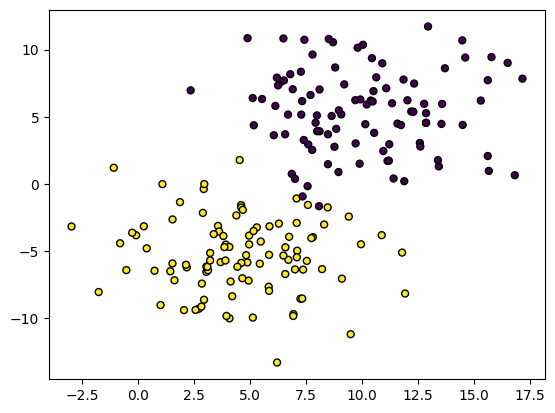

In [36]:
from IPython.display import clear_output

learning_rate = 0.00001
n_epoch = 1000

for i in range(n_epoch):
    y_pred = torch.matmul(X, w) + b #получаем предсказание - умножаем X на матрицу весов
    y_pred = torch.sigmoid(y_pred) #засовываем предсказание в рамки от 0 до 1
    loss = binary_cross_entropy(y, y_pred)
    loss = torch.sum(loss)

    loss.backward()

    w.data -= learning_rate * w.grad.data #обновляем веса - из старого значения весов вычитваем константу на лернинг рейт
    b.data -= learning_rate * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    #код для визуализации
    if (i + 1) % 5 == 0:
        # if True:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = w.data[0]
        w_2 = w.data[1]
        w_0 = b.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Теперь все за нас делает пайторч

# Немного про оптимизаторы

Сущность, которая на вход принимает параметры модели и меняет эти веса

Работает на градиентном спуске

Чтоб не было ошибки на минимумах и максимумах добавить составляющую импульса (какая-то инерция нашей точки)

Самый лучший - ada

![](https://mpopov.com/images/adam-animated.gif)

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/optimizers.gif)

![](https://images.viblo.asia/993c2fcc-ece4-41d8-bca7-5442e9ce3836.gif)

# Инициализируем модель

In [1]:
model = torch.nn.Linear(2, 1) #линейный слой, два входа, один выход
criterion = torch.nn.BCELoss() #нужный лосс

optim = torch.optim.SGD(model.parameters(), lr=0.1) #оптимайзер

model.train() #переводим в режим трейн чтобы не считались градиенты
#не трейн - eval

NameError: name 'torch' is not defined

In [ ]:
model

In [ ]:
model.weight

In [ ]:
model.bias

In [ ]:
model.weight.data.dtype

In [ ]:
from IPython.display import clear_output


for i in range(1000):
    # считаем предсказание
    y_pred = torch.sigmoid(model(X.float()))

    # считаем лосс
    loss = criterion(y_pred.flatten(), y.float())

    # прокидываем градиенты
    loss.backward()

    # делаем шаг оптимизатором
    optim.step()

    # зануляем градиенты
    optim.zero_grad()

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]
        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Пусть теперь проблема нелинейная

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=17)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model.train()

In [ ]:
from IPython.display import clear_output


for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()

    if (i + 1) % 500 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]
        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-2, 2, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Визуализируем разделяющую плоскость

In [ ]:
h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
model.eval()
Z = torch.sigmoid(model(input_tensor))
Z = Z.reshape(xx.shape)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

plt.show()

# Делаем модель сложнее

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
from torch import nn

# Cоберите двуслойную модель

In [ ]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 2))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(2, 1))

In [ ]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.0)

model.train()

In [ ]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Усложним модель (увеличим количество слоев)

In [ ]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 2))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(2, 2))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(2, 1))

In [ ]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.0, momentum=0.9)

model.train()

In [ ]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Еще усложним модель (увеличим размерность скрытых слоев)

In [ ]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 5))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(5, 5))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(5, 1))
model.add_module("third_activation", nn.Sigmoid())

In [ ]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2, momentum=0.9)

model.train()

# model.to('cuda:2')

In [ ]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(3000):

    y_pred = model(X.float())

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 50 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Сделаем > 2 классов

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# blobs with varied variances
X, y = make_blobs(n_samples=400, cluster_std=[1.0, 1.5, 0.5], random_state=17)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 5))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(5, 5))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(5, 3))

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

In [ ]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()
for i in range(1000):

    y_pred = model(X.float())

    loss = criterion(y_pred, y.long())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 25 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = model(input_tensor)
        Z = torch.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Реальные данные

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Lambda

# 1. Грузим данные

In [ ]:
data_folderpath = "../../data"
training_data = datasets.FashionMNIST(
    root=data_folderpath, train=True, download=True, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=data_folderpath, train=False, download=True, transform=ToTensor()
)

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
X_sample, y_sample = training_data[0]
print(X_sample)
print(y_sample)

In [ ]:
X_sample.shape

# Создаем собственный датасет

In [ ]:
import pandas as pd
import numpy as np


class CustomImageDataset(Dataset):
    def __init__(self, data_file, transform=None, target_transform=None):
        self.data = pd.read_csv(data_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        image = self.data.iloc[idx, 1:].values.reshape(28, 28).astype(np.uint8)
        label = self.data.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
train_data_url = "https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_train.csv"
test_data_url = "https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_test.csv"

In [ ]:
train = CustomImageDataset(
    train_data_url,
    transform=ToTensor(),
    target_transform=Lambda(
        lambda y: torch.zeros(10, dtype=torch.float).scatter_(
            0, torch.tensor(y), value=1
        )
    ),
)
test = CustomImageDataset(
    test_data_url,
    transform=ToTensor(),
    target_transform=Lambda(
        lambda y: torch.zeros(10, dtype=torch.float).scatter_(
            0, torch.tensor(y), value=1
        )
    ),
)

In [ ]:
X_sample, y_sample = train[0]

In [ ]:
X_sample

In [ ]:
X_sample.shape

In [ ]:
y_sample

In [ ]:
y_sample.shape

In [ ]:
train.data

# Познаем даталоадеры

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 2. Собираем нейросеть

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

# Смотрим детально в слои сети

In [ ]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

In [ ]:
input_image

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

In [ ]:
flat_image

In [ ]:
layer1 = nn.Linear(in_features=28 * 28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

In [ ]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(20, 10))
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [ ]:
logits.shape

In [ ]:
logits

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

In [ ]:
pred_probab.argmax(dim=1)

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

# 3. Тренируем сеть

#### Инициализируем модель

In [ ]:
model = NeuralNetwork()

#### Инициализируем параметры

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### Инициализируем функцию потерь

In [ ]:
loss_fn = nn.CrossEntropyLoss()

#### Инициализируем оптимизатор

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Описываем функции тренировки и тестирования модели

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

# Весь материал ниже считаем факультативным

---

# 4. Изучаем свертки

![image.png](attachment:7461278f-5be3-49c3-8c5a-fbc767f98b73.png)

![](https://wikidocs.net/images/page/164365/Fig_04_cnn_filter.png)

![image.png](attachment:0399f665-7e9d-4cd9-8b6b-5372b7525f34.png)

![image.png](attachment:1592aa56-9ccd-4472-8c3f-ea1870fdbf50.png)

![](https://blog.kakaocdn.net/dn/lgBRU/btqWWtkNJhM/DsJwc0PXrbhS0n33Vqzgm1/img.gif)

![](https://www.mobiquity.com/hs-fs/hubfs/CNN03.gif?width=640&name=CNN03.gif)

![](https://i.stack.imgur.com/9bi5k.gif)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL
import torch
import torchvision


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[..., ::-1])
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()


def show_grayscale_image(image, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
layer = torch.nn.Conv2d(1, 1, kernel_size=(3, 3))
layer.weight

In [ ]:
# вес доступен через .weight.data
layer.weight.data = torch.ones_like(layer.weight.data)
layer.weight.data /= torch.sum(layer.weight.data)
layer.weight.data

In [ ]:
layer.bias.data = torch.zeros_like(layer.bias.data)
layer.bias.data

In [ ]:
layer.train()
layer.eval()

In [ ]:
input_tensor = torch.arange(9).reshape(1, 1, 3, 3)
input_tensor.shape

1 - размер батча 1 - кол-во каналов (1, если черно-белый, 3, если цветной) 3 - высота 3 - ширина

In [ ]:
input_tensor

In [ ]:
output_tensor = layer(input_tensor.float())

In [ ]:
output_tensor

## Какие бывают фильтры

In [ ]:
from urllib.request import urlopen


req = urlopen(
    "https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8&w=1000&q=80"
)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, 0)

In [ ]:
img.shape

In [ ]:
show_grayscale_image(img)

In [ ]:
to_tensor = torchvision.transforms.ToTensor()
img_tensor = to_tensor(img)
img_tensor

In [ ]:
img_tensor.shape

In [ ]:
# делаем так, чтобы нейросеть могла считать изображение

img_tensor = img_tensor.reshape((1, 1, 1500, 1000))

In [ ]:
kernel_size = 50
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

# обновляем веса свертки

layer.weight.data = torch.ones_like(layer.weight.data)
layer.weight.data /= torch.sum(layer.weight.data)

In [ ]:
layer.weight.data

In [ ]:
output_tensor = layer(img_tensor)
output_tensor.shape

In [ ]:
import torchvision.transforms as transforms

# функция, переводящее тензор в PIL-изображение
to_pil_image = transforms.ToPILImage()
output_img = to_pil_image(output_tensor.squeeze(0))

In [ ]:
show_grayscale_image(output_img)

In [ ]:
def show_image_with_kernel(img_input, kernel):
    layer = torch.nn.Conv2d(1, 1, kernel_size=3)
    layer.weight.data = our_kernel.reshape(1, 1, 3, 3)
    output_tensor = layer(img_input)
    output_img = to_pil_image(output_tensor.squeeze(0))
    show_grayscale_image(output_img)

In [ ]:
our_kernel = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor(
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=torch.float32
)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

![](https://miro.medium.com/v2/resize:fit:738/0*4tHPDjvQXX9obrhK.gif)

![](https://qph.cf2.quoracdn.net/main-qimg-c05ec72225e19614f0cc10385d27525c)

![](https://blog.ca.meron.dev/images/Convolution.gif)

![](https://i.stack.imgur.com/ptDPZ.gif)

![](https://lukeguerdan.com/assets/img/TCNfigureA.png)

![](https://theaisummer.com/static/490be17ee7f19b78003c3fdf5a6bbafc/83b75/receptive-field-in-convolutional-networks.png)

![](https://i.ytimg.com/vi/KuXjwB4LzSA/maxresdefault.jpg)

![](https://saturncloud.io/images/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way.jpg)

![](https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-vgg-architecture-1024x611.png)

![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

Визуализация сверточных слоев https://distill.pub/2017/feature-visualization/

# Теперь пора писать свою сверточную нейросеть

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
batch_size = 4

# dataset задаёт данные
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
# dataloader подгружает их
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    # убрать нормализацию
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# взять случайный батч изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print("  ".join("{}".format(classes[labels[j]]) for j in range(4)))

In [ ]:
def train_model(net, criterion, optimizer, trainloader, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            # Давайте сами напишем код тут

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:
                print(
                    "Epoch {0}/{1}, iteration {2}, loss: {3:.3f}".format(
                        epoch + 1, num_epochs, i + 1, running_loss / 2000
                    )
                )
                running_loss = 0.0
        print()

    print("Finished Training")

    return net

In [ ]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(
        "Accuracy of the network on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

In [ ]:
def class_accuracy(net, testloader):
    class_correct = list(0.0 for i in range(10))
    class_total = list(0.0 for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print(
            "Accuracy of {} : {} %".format(
                classes[i], 100 * class_correct[i] / class_total[i]
            )
        )

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


net = FeedForwardNet()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

In [ ]:
all_accuracy(net, testloader)

In [ ]:
class_accuracy(net, testloader)

## Свёрточная сеть для классификации

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

In [ ]:
# сохраним сеть
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(
    "GroundTruth: ",
    " ".join("{}".format(classes[labels[j]]) for j in range(batch_size)),
)

In [ ]:
# загрузим сеть
net_loaded = Net()
net_loaded.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net_loaded(images)
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("{}".format(classes[predicted[j]]) for j in range(4)))

In [ ]:
all_accuracy(net, testloader)

In [ ]:
class_accuracy(net, testloader)